# Conjugate Gradient for logistic regression

Author: Alexandre Gramfort

In [12]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin_cg

In [13]:
fmin_cg?

Signature: fmin_cg(f, x0, fprime=None, args=(), gtol=1e-05, norm=inf, epsilon=1.4901161193847656e-08, maxiter=None, full_output=0, disp=1, retall=0, callback=None)
Docstring:
Minimize a function using a nonlinear conjugate gradient algorithm.

Parameters
----------
f : callable, ``f(x, *args)``
    Objective function to be minimized.  Here `x` must be a 1-D array of
    the variables that are to be changed in the search for a minimum, and
    `args` are the other (fixed) parameters of `f`.
x0 : ndarray
    A user-supplied initial estimate of `xopt`, the optimal value of `x`.
    It must be a 1-D array of values.
fprime : callable, ``fprime(x, *args)``, optional
    A function that returns the gradient of `f` at `x`. Here `x` and `args`
    are as described above for `f`. The returned value must be a 1-D array.
    Defaults to None, in which case the gradient is approximated
    numerically (see `epsilon`, below).
args : tuple, optional
    Parameter values passed to `f` and `fprime`. M

In [4]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

# Make it binary
X = X[y < 2]
y = y[y < 2]

# add intercept column of ones - 
X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)

y[y == 0] = -1

In [5]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

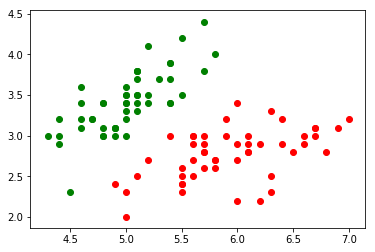

In [6]:
plt.scatter(X[y > 0, 0], X[y > 0, 1], color='r')
plt.scatter(X[y < 0, 0], X[y < 0, 1], color='g')

In [7]:
all_pobj = []

def f(w):
    pobj = np.sum(np.log(1. + np.exp(- y * np.dot(X, w))))
    all_pobj.append(pobj)
    return pobj

def fprime(w):
    ywTx = y * np.dot(X, w)
    temp = 1. / (1. + np.exp(ywTx))
    grad = -np.dot(X.T, (y * temp))
    return grad

In [8]:
alpha = 0.01
n_features = X.shape[1]
w = fmin_cg(f, np.zeros(n_features), fprime)

Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 50
         Function evaluations: 198
         Gradient evaluations: 198


In [9]:
np.sign(np.dot(X, w)) - y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

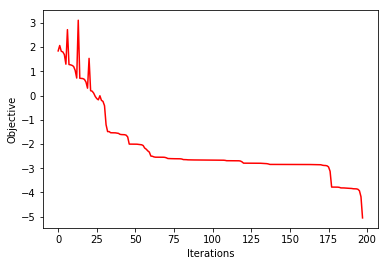

In [10]:
plt.plot(np.log10(all_pobj), 'r')
plt.xlabel('Iterations')
plt.ylabel('Objective')
plt.show()

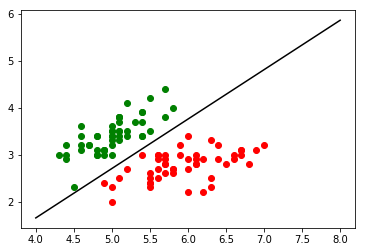

In [11]:
plt.scatter(X[y > 0, 0], X[y > 0, 1], color='r')
plt.scatter(X[y < 0, 0], X[y < 0, 1], color='g')
xx = np.linspace(4, 8, 10)
plt.plot(xx,  - xx * w[0] / w[1] - w[2] / w[1], 'k');

### Question : add support for intercept (be careful unregularised)